# Double Exponential Moving Average (DEMA) 

https://www.investopedia.com/terms/d/double-exponential-moving-average.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [5]:
df['EMA'] = ta.EMA(df['Adj Close'], timeperiod=5) 

In [7]:
df['EMA_S'] = ta.EMA(df['EMA'], timeperiod=5) 

In [8]:
df['DEMA'] = (2*df['EMA']) - df['EMA_S']

In [9]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,EMA,EMA_S,DEMA
Date,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,204.297842,NaN,NaN
2018-08-08,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,204.508127,NaN,NaN
2018-08-09,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,205.185563,NaN,NaN
2018-08-10,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,205.432120,NaN,NaN
2018-08-13,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,206.039707,205.092672,206.986743


Text(0,0.5,'Price')

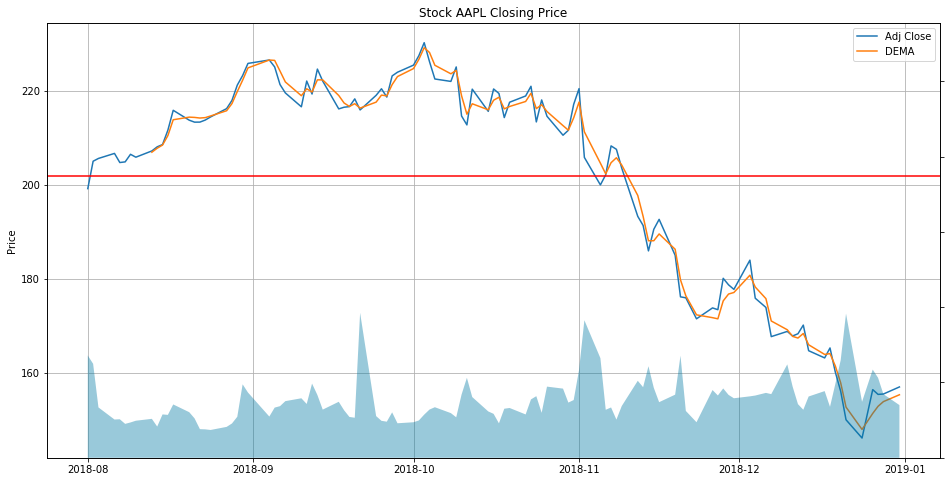

In [11]:
# Line Chart
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['DEMA'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

## Candlestick with DEMA

In [12]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,EMA_S,DEMA,VolumePositive
0,736919.0,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,206.039707,205.092672,206.986743,False
1,736920.0,210.160004,210.559998,208.259995,209.750000,208.128067,20748000,206.735827,205.640390,207.831264,False
2,736921.0,209.220001,210.740005,208.330002,210.240005,208.614273,28807600,207.361976,206.214252,208.509699,False
3,736922.0,211.750000,213.809998,211.470001,213.320007,211.670471,28500400,208.798141,207.075548,210.520733,False
4,736923.0,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,211.164601,208.438566,213.890636,True


Text(0,0.5,'Price')

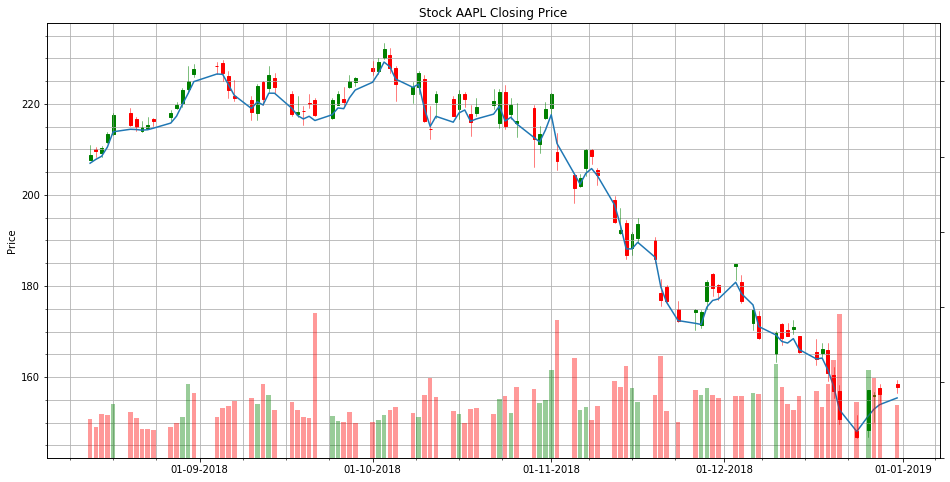

In [13]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['DEMA'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')